In [1]:
import numpy as np
import scipy.fftpack as ft

#  Homework 8


1.  Calculate the DC term for a 48x48 image.  Create the image array using the random number seed of 20,000.  Show that the DC term equals the sum of the input signal.<br><br>

In [12]:
np.random.seed(20000)
mga = np.random.ranf((48,48))
mgb = ft.fft2(mga)
print('\nSum of input signal:', round(mga.sum(),2))

print('\nDC Term:', np.round(mgb[0,0],2))

if np.allclose(mga.sum(),mgb[0,0]): print('\nThe DC term equals the sum of the input siginal')


Sum of input signal: 1165.26

DC Term: (1165.26-0j)

The DC term equals the sum of the input siginal


2. Write python code to prove $\mathfrak{F}^{-1} \mathfrak{F} \mathbf{a}[\vec{x}] = \mathbf{a}[\vec{x}]$ for a 48x48 pixel image.  Use the random seed as in problem #1.  This shows that the energy is conserved and that there is no loss in the process.<br><br>


In [14]:
np.random.seed(20000)
mga = np.random.ranf((48,48)) # original image
mgb = ft.fft2(mga) #Fourier transform of the original image
mgc = ft.ifft2(mgb) #inverse fourier transform of the fourier transformed image

if np.allclose(mga,mgc): print('No energy was lost in transforming the image to a frequency time space then back to a rectalinear space.')

No energy was lost in transforming the image to a frequency time space then back to a rectolinear space.


3. Create a Kaiser Mask with a frame size of (256, 256) and a mask centered on (128, 128) with pixel values of one inside the radius of 40 decaying to zero at 60.  Repeat the problem with the pixel values of one inside the radius of 10 decaying to zero at 60.  Describe you observations comparing the two images.<br><br>

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

def KaiserMask(shape, center, r1, r2):
    # returns a mask that you can use over and over again.
    di, dj = center  # location of the center of the window
    v,h = shape
    theta = 2. * np.pi
    Iot = 1.0 + theta/4. + 2.*theta/64. + 3.*theta/2304.

    # compute radii
    vindex = np.multiply.outer(np.arange(v), np.ones(h))
    hindex = np.multiply.outer(np.ones(v), np.arange(h))
    a = (di-vindex).astype(float)
    b = dj-hindex
    r = np.sqrt(a*a + b*b)
    del a,b

    # inside r1, and outside r2 are easy
    mask = np.zeros(shape, float)
    mask = (r < r1).astype(int)

    # work on the ring between
    b = np.logical_and((r<r2), (r>r1))
    m = (r-r1)/(r2-r1)
    m = m*b
    a = theta * np.sqrt( 1.-m*m)
    a = 1.0 + a/4.0 + 2.0*a/64.0 + 3.0*a/2304.0
    a = a / Iot
    a = a * (r< r2)
    a = a * (r>=r1).astype(int)
    mask = mask + a
    return mask

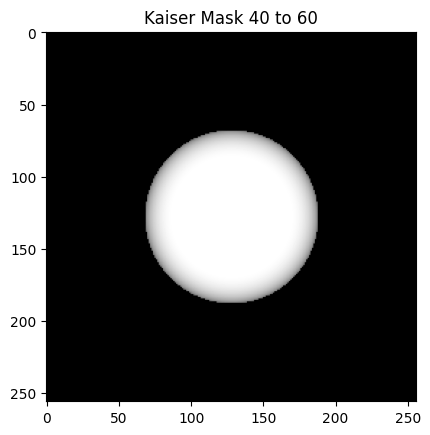

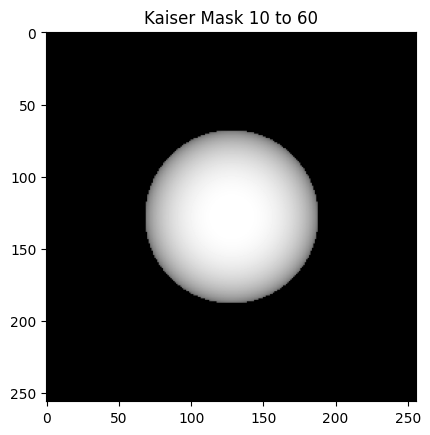

In [32]:
mask = KaiserMask((256,256), (128,128), 40, 60)

plt.title('Kaiser Mask 40 to 60')
plt.imshow(mask, cmap='gray')
plt.show()
#print(mask[128:,128])

mask2 = KaiserMask((256,256), (128,128), 10, 60)

plt.title('Kaiser Mask 10 to 60')
plt.imshow(mask2, cmap='gray')
plt.show()

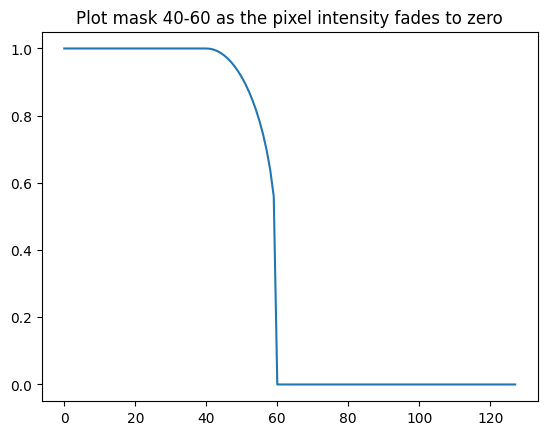

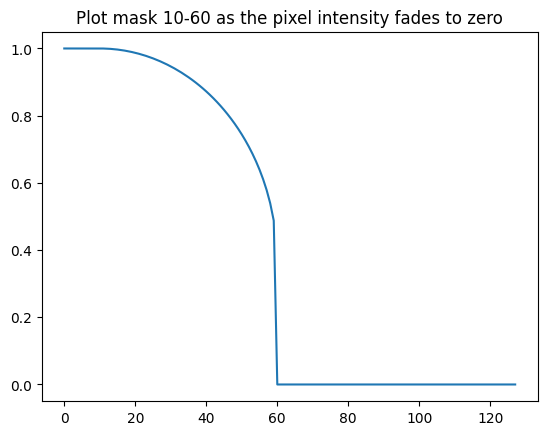

In [33]:
'''print(type(mask))
print(mask.shape)'''
plt.plot(mask[128:,128]);plt.title('Plot mask 40-60 as the pixel intensity fades to zero'); plt.show()
plt.plot(mask2[128:,128]);plt.title('Plot mask 10-60 as the pixel intensity fades to zero'); plt.show()

It seems that the r1 or the variable controling at what threshold the pixels begin to fade down to black, creating a gradiant from one to zero as you leave the origin of the circle. The difference between the two masks is when the pixel values begin to decay to zero, which results in a steeper curve.